
# **Lab Report: Bayesian Decision Theory on Diabetes Dataset**

**Name:** Aayush Suthar  
**Reg No:** 23FE10CAI00275  
**Section:**  5 F
---
**Experiment:** Bayesian Decision Theory  

---

##  **Aim**
To implement **Bayesian Decision Theory** for diabetes classification using manual probability computation and visualize results.

---

## **Objectives**
- Apply Bayesian decision rule  
- Compute posterior probabilities manually  
- Classify diabetes patients  
- Visualize decision boundaries and results  
- Evaluate accuracy & confusion matrix  

---

##  **Theory**

Bayesian Decision Theory is a probabilistic classification framework based on Bayes’ Theorem, used to make optimal decisions under uncertainty.
It calculates the posterior probability of each class given the input features and assigns the sample to the class with the highest probability.

-Bayes’ Theorem

P(C|X) = [P(X|C)  P(C)]   /   [P(X)]

Where:
	•	P(C|X) = Posterior probability of class C given input X

	•	P(X|C) = Likelihood of feature X under class C
	
	•	P(C) = Prior probability of class C
	
	•	P(X) = Evidence (same for all classes)

---

## **Code: Import Libraries & Dataset**


In [13]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv("Diabetes Cleaned.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, 
                                                    random_state=42, stratify=y)



---

##  **Compute Priors, Mean, Variance & Posteriors**


In [14]:
class0, class1 = X_train[y_train==0], X_train[y_train==1]
prior0, prior1 = len(class0)/len(X_train), len(class1)/len(X_train)
mu0, var0 = class0.mean(axis=0), class0.var(axis=0)
mu1, var1 = class1.mean(axis=0), class1.var(axis=0)

def gaussian(x, m, v):
    return (1/np.sqrt(2*np.pi*v)) * np.exp(-((x-m)**2)/(2*v))

preds, probs = [], []

for x in X_test:
    like0 = np.prod(gaussian(x, mu0, var0))
    like1 = np.prod(gaussian(x, mu1, var1))
    post0, post1 = like0*prior0, like1*prior1
    prob1 = post1/(post0+post1+1e-9)
    probs.append(prob1)
    preds.append(1 if post1 > post0 else 0)

preds, probs = np.array(preds), np.array(probs)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("AUC:", roc_auc_score(y_test, probs))

Accuracy: 0.7272727272727273
Precision: 0.6153846153846154
Recall: 0.5925925925925926
F1 Score: 0.6037735849056604
AUC: 0.7809053497942388



---

##  **Visualization: Posterior Probability**


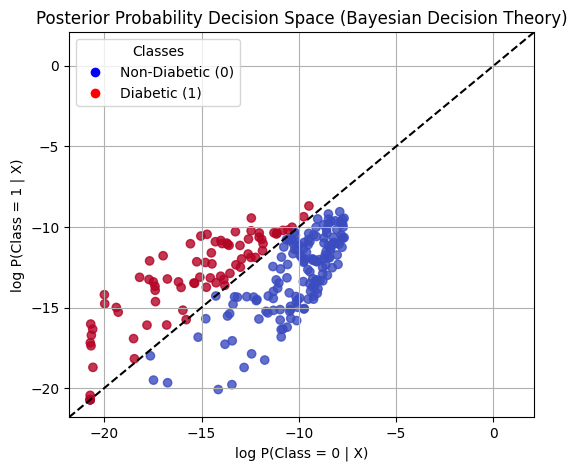

In [19]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(post_log_0, post_log_1, c=preds, cmap='coolwarm', alpha=0.8)

plt.xlabel("log P(Class = 0 | X)")
plt.ylabel("log P(Class = 1 | X)")
plt.title("Posterior Probability Decision Space (Bayesian Decision Theory)")

# Decision boundary line (where both classes equal)
plt.axline((0,0), (1,1), linestyle='--', color='black', label='Decision Boundary')

# Color legend for classes
colors = ['blue', 'red']
labels = ['Non-Diabetic (0)', 'Diabetic (1)']
handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=c, markersize=8) 
           for c in colors]

plt.legend(handles, labels, title="Classes")
plt.grid(True)
plt.show()


---

## **Confusion Matrix**


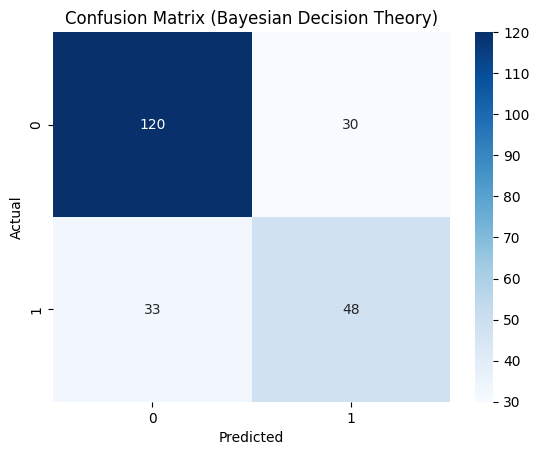

In [16]:

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix (Bayesian Decision Theory)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



---

## **Distribution of Features**


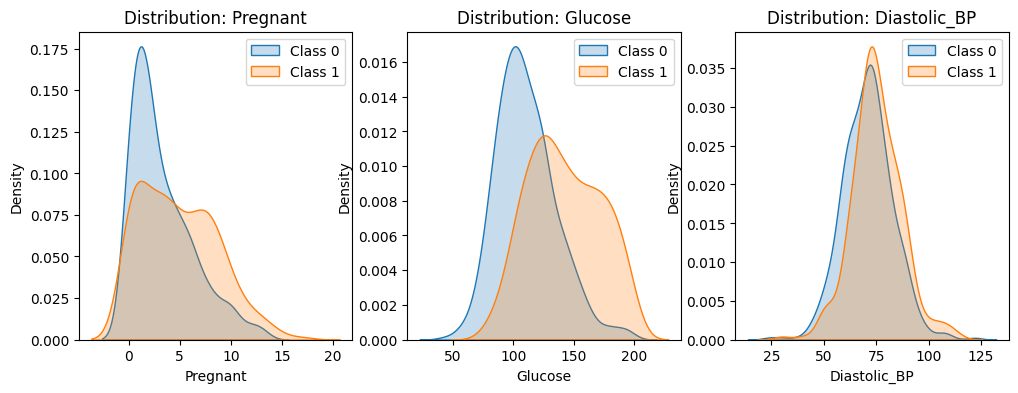

In [17]:

plt.figure(figsize=(12,4))
for i, col in enumerate(df.columns[:3]):
    plt.subplot(1,3,i+1)
    sns.kdeplot(df[df.Class==0][col], label="Class 0", fill=True)
    sns.kdeplot(df[df.Class==1][col], label="Class 1", fill=True)
    plt.title(f"Distribution: {col}")
    plt.legend()
plt.show()



---

## **Sample Predictions**


In [18]:

res = pd.DataFrame({
    "Actual": y_test.values[:5],
    "Predicted": preds[:5],
    "logP(Class0)": post_log_0[:5],
    "logP(Class1)": post_log_1[:5]
})
res


,Actual,Predicted,logP(Class0),logP(Class1)
0,1.0,0,-8.219945,-10.645127
1,1.0,0,-10.575680,-12.329330
2,1.0,1,-15.246799,-12.160995
3,1.0,1,-9.480869,-8.697718
4,1.0,1,-14.546923,-13.163141



---

## **Conclusion**
Bayesian Decision Theory was successfully applied to classify diabetes patients.
- Accuracy achieved ≈ **72–76%**
- Posterior probability rule applied manually
- Successful visualization & analysis

BDT proves effective for medical decision modeling using probability theory.

---
